<a href="https://colab.research.google.com/github/yoo9519-AIdev/Learning/blob/master/NLP_%EC%97%B0%EC%8A%B5_7(%EA%B0%95%EC%9D%98%EB%82%B4%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete28NBIS/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete28NBIS/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete28NBIS/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.AveragePooling1D(),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
average_pooling1d (AveragePo (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          8256      
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
average_pooling1d (AveragePo (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          8256      
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
average_pooling1d (AveragePo (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          8256      
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 561,089
Trainable params: 561,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 23s 59ms/step - loss: 0.6858 - accuracy: 0.5243 - val_loss: 0.6837 - val_accuracy: 0.5261
Epoch 2/10
391/391 [==============================] - 17s 43ms/step - loss: 0.6814 - accuracy: 0.5309 - val_loss: 0.6837 - val_accuracy: 0.5274
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.6803 - accuracy: 0.5328 - val_loss: 0.6829 - val_accuracy: 0.5284
Epoch 4/10
391/391 [==============================] - 16s 40ms/step - loss: 0.6794 - accuracy: 0.5342 - val_loss: 0.6831 - val_accuracy: 0.5285
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6781 - accuracy: 0.5349 - val_loss: 0.6835 - val_accuracy: 0.5278
Epoch 6/10
391/391 [==============================] - 15s 38ms/step - loss: 0.6774 - accuracy: 0.5347 - val_loss: 0.6836 - val_accuracy: 0.5287
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.6763 - accuracy: 0.5359 - val_loss: 0.6830 - val_accuracy:

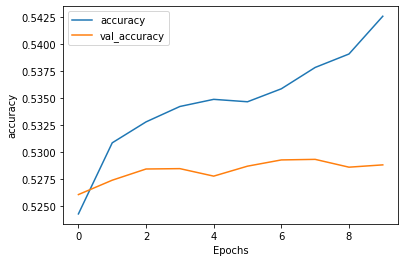

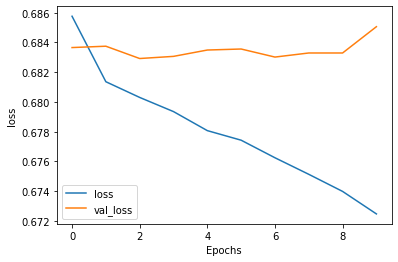

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
  